In [14]:
import geopandas
import pandas
import pathlib
import numpy
import matplotlib
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
sampling_resolution = 10
threshold = 1

In [9]:
width_file = pathlib.Path(fr"C:\Users\pearsonra\Documents\data\river_bathemetry\waikanae\caches\100000000\final_transects_100000000.geojson")
rec_main_channel_file = pathlib.Path(fr"C:\Users\pearsonra\Documents\data\river_bathemetry\waikanae\caches\100000000\rec_main_channel.geojson")

In [4]:
#width_file = pathlib.Path(fr"C:\Users\pearsonra\Documents\data\river_bathemetry\waikanae\waikanae_river_widths_at_{sampling_resolution}m_upriver_spacing_{threshold}m_bank_threshold_upstream.geojson")
#width_file_midpoints = pathlib.Path(fr"C:\Users\pearsonra\Documents\data\river_bathemetry\waikanae\waikanae_river_widths_at_{sampling_resolution}m_upriver_spacing_{threshold}m_bank_threshold_upstream_2_3_midpoint.geojson")
mannings_file = pathlib.Path(r"C:\Users\pearsonra\Documents\data\river_bathemetry\mannings_n\bathy.csv.gz")
depths_old_file = pathlib.Path(r"C:\Users\pearsonra\Documents\data\river_bathemetry\mannings_n\waikanae_depths.csv")

In [10]:
widths = geopandas.read_file(width_file)
main_channel = geopandas.read_file(rec_main_channel_file)
#widths_midpoints = geopandas.read_file(width_file_midpoints)
mannings = pandas.read_csv(mannings_file)
depths = pandas.read_csv(depths_old_file)

# Translate the samples to correct reach

In [18]:
widths['nzsegment'] = numpy.zeros(len(widths['widths']), dtype=int) * -1
for i, row in main_channel.iterrows():
    widths.loc[widths.intersects(row.geometry), ('nzsegment')] = row['nzsegment']

# Add the flows and manning's n to the widths table

In [44]:
key_parameters['nzsegment'].unique()

array([9253579, 9253587, 9253625, 9253707, 9253724, 9253695, 9253696,
       9253850, 9253861, 9253907, 9253968, 9254020, 9254100, 9254160,
       9254352, 9254385])

In [33]:
key_parameters = widths[['nzsegment', 'slope', 'widths_Savgol']]
key_parameters = key_parameters[key_parameters['nzsegment'] != 0]

In [69]:
key_parameters['mannings_n'] = numpy.zeros(len(key_parameters['nzsegment']), dtype=int)
key_parameters['flow'] = numpy.zeros(len(key_parameters['nzsegment']), dtype=int)
for nzsegment in key_parameters['nzsegment'].unique():
    key_parameters.loc[key_parameters['nzsegment'] == nzsegment, ('mannings_n')] = mannings[mannings['nzsegment'] == nzsegment]['n'].unique()[0]
    key_parameters.loc[key_parameters['nzsegment'] == nzsegment, ('flow')] = mannings[mannings['nzsegment'] == nzsegment]['flow'].unique()[0]

In [64]:
mannings[mannings['nzsegment'] == 9253579]['n'].unique()[0]

0.0377

<AxesSubplot:>

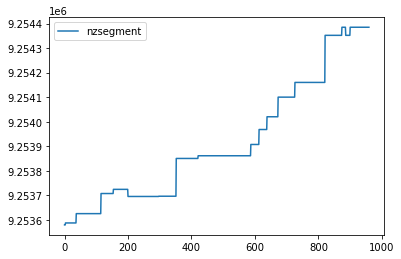

In [76]:
key_parameters[['nzsegment']].plot()

<AxesSubplot:>

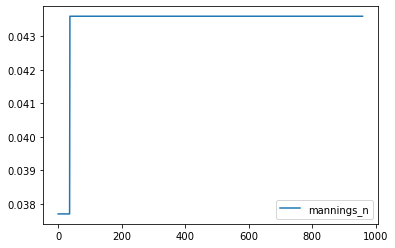

In [91]:
key_parameters[['mannings_n']].plot()

<AxesSubplot:>

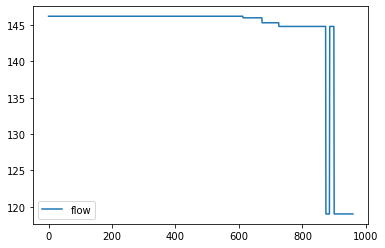

In [77]:
key_parameters[['flow']].plot()

<AxesSubplot:>

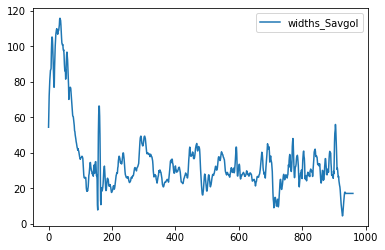

In [79]:
key_parameters[['widths_Savgol']].plot()

<AxesSubplot:>

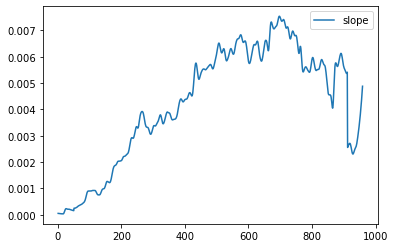

In [80]:
key_parameters[['slope']].plot()

In [98]:
key_parameters['depth_Neal_et_al'] = (key_parameters['mannings_n'] * key_parameters['flow'] / (numpy.sqrt(key_parameters['slope']) * key_parameters['widths_Savgol'])) ** (3/5)

<AxesSubplot:>

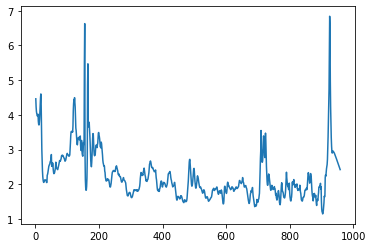

In [99]:
key_parameters['depth_Neal_et_al'].plot()

In [93]:
a = 0.745
b = 0.305
K_0 = 6.16

In [96]:
key_parameters['depth_Smart_et_al'] = (key_parameters['flow'] / (K_0 * key_parameters['widths_Savgol'] * key_parameters['slope'] ** b)) ** (1 / (1+a))

<AxesSubplot:>

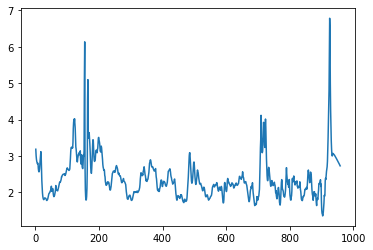

In [97]:
key_parameters['depth_Smart_et_al'].plot()

In [87]:
numpy.sqrt(key_parameters['slope'])*key_parameters['widths_Savgol'];

In [88]:
(key_parameters['mannings_n']*key_parameters['flow'] / numpy.sqrt(key_parameters['slope'])*key_parameters['widths_Savgol']) ** (3/5)

0             NaN
1      662.418879
2      715.882918
3      755.664149
4      785.526795
          ...    
955     75.845774
956     75.037390
957     74.223157
958     73.402925
959     72.576535
Length: 960, dtype: float64

In [58]:
key_parameters.loc[key_parameters['nzsegment'] == 9253579, ('mannings_n')] = 0.0377

In [59]:
key_parameters.loc[key_parameters['nzsegment'] == 9253579, ('mannings_n')]

0    0.0377
1    0.0377
2    0.0377
Name: mannings_n, dtype: float64

In [68]:
mannings['n'].unique()

array([0.0318, 0.0436, 0.0377, 0.0495, 0.0259, 0.02  , 0.0554, 0.0613])

In [ ]:
widths_midpoints['n'] = depths['n']
widths_midpoints['flow'] = depths['flow']
widths_midpoints['depth'] = depths['depth']

In [ ]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
depths['depth'].plot(ax=ax, linewidth=2)
ax.set(title=f"Depths for {threshold}m threshold")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River depth in m");

In [ ]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
depths['n'].plot(ax=ax, linewidth=2)
ax.set(title=f"Mannings N for {threshold}m threshold")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River Mannings M in m");

In [ ]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
depths['flow'].plot(ax=ax, linewidth=2)
ax.set(title=f"Flows for {threshold}m threshold")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River flow in m^3/s");

In [ ]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
depths['slope'].plot(ax=ax, linewidth=2)
ax.set(title=f"Slopes for {threshold}m threshold")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River slope");

In [ ]:
f, ax = matplotlib.pyplot.subplots(figsize=(10, 3))
depths['width'].plot(ax=ax, linewidth=2)
ax.set(title=f"Widths for {threshold}m threshold in m")
matplotlib.pyplot.xlabel(f"Transect number (spaced every {sampling_resolution}m upstream)")
matplotlib.pyplot.ylabel(f"River width (m)");

In [ ]:
mannings['nzsegment'].unique().min()

In [ ]:
widths['nzsegment'].unique()

In [ ]:
mannings[mannings['nzsegment']==9003742]

In [ ]:
for nzsegment in widths['nzsegment'].unique():
    print(f"{nzreach_re}: {(mannings['nzsegment'] == nzsegment).any()}")

In [ ]:
widths_midpoints.to_file(fr"C:\Users\pearsonra\Documents\data\river_bathemetry\waikanae\waikanae_river_depths_at_{sampling_resolution}m_upriver_spacing_{threshold}m_bank_threshold_upstream_2_3.geojson")

In [ ]:
widths.head()

In [ ]:
widths_midpoints.plot()